In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [88]:
df = pd.read_csv('CarPrice_Assignment.csv')

In [54]:
df.shape

(205, 26)

In [55]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [58]:
def converter(list):
    num_dict = {'one':1,
            'two':2,
            'three':3,
            'four':4,
            'five':5,
            'six':6,
            'seven':7,
            'eight':8,
            'nine':9,
            'ten': 10,
            'twelve':12}
    
    for i in range(len(list)):
        if list[i] in num_dict:
            list[i] = num_dict[list[i]]

    return list

In [59]:
df['cylindernumber'] = converter(df['cylindernumber'])
df['cylindernumber'] = df['cylindernumber'].astype('int64')

df['doornumber'] = converter(df['doornumber'])
df['doornumber'] = df['doornumber'].astype('int64')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_32692\3526257357.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  list[i] = num_dict[list[i]]


In [60]:
df['cylindernumber'].unique()

array([ 4,  6,  5,  3, 12,  2,  8], dtype=int64)

In [61]:
df.duplicated().sum(),'****************','****************' ,df.isnull().sum()

(0,
 '****************',
 '****************',
 car_ID              0
 symboling           0
 CarName             0
 fueltype            0
 aspiration          0
 doornumber          0
 carbody             0
 drivewheel          0
 enginelocation      0
 wheelbase           0
 carlength           0
 carwidth            0
 carheight           0
 curbweight          0
 enginetype          0
 cylindernumber      0
 enginesize          0
 fuelsystem          0
 boreratio           0
 stroke              0
 compressionratio    0
 horsepower          0
 peakrpm             0
 citympg             0
 highwaympg          0
 price               0
 dtype: int64)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    int64  
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    int64  
 16  enginesize        205 non-null    int64  
 1

In [63]:
df.describe()

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,3.121951,98.756585,174.049268,65.907805,53.724878,2555.565854,4.380488,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,0.994966,6.021776,12.337289,2.145204,2.443522,520.680204,1.080854,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,2.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,4.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,4.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,4.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,4.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [64]:
df.corr()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_32692\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.190352,0.129729,0.170636,0.052387,0.255960,0.071962,-0.094493,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.664073,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.113129,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
doornumber,0.190352,-0.664073,1.000000,0.447357,0.398568,0.207168,0.552208,0.197379,-0.016009,0.020742,0.119258,-0.011082,0.177888,-0.126947,-0.247668,-0.012417,-0.036330,0.031835
wheelbase,0.129729,-0.531954,0.447357,1.000000,0.874587,0.795144,0.589435,0.776386,0.339507,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.398568,0.874587,1.000000,0.841118,0.491029,0.877728,0.430672,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.207168,0.795144,0.841118,1.000000,0.279210,0.867032,0.545007,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.552208,0.589435,0.491029,0.279210,1.000000,0.295572,-0.013995,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.197379,0.776386,0.877728,0.867032,0.295572,1.000000,0.609727,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
cylindernumber,-0.094493,-0.113129,-0.016009,0.339507,0.430672,0.545007,-0.013995,0.609727,1.000000,0.846031,0.231399,0.008210,-0.020002,0.692016,-0.124172,-0.445837,-0.466666,0.718305
enginesize,-0.033930,-0.105790,0.020742,0.569329,0.683360,0.735433,0.067149,0.850594,0.846031,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_32692\3769812938.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


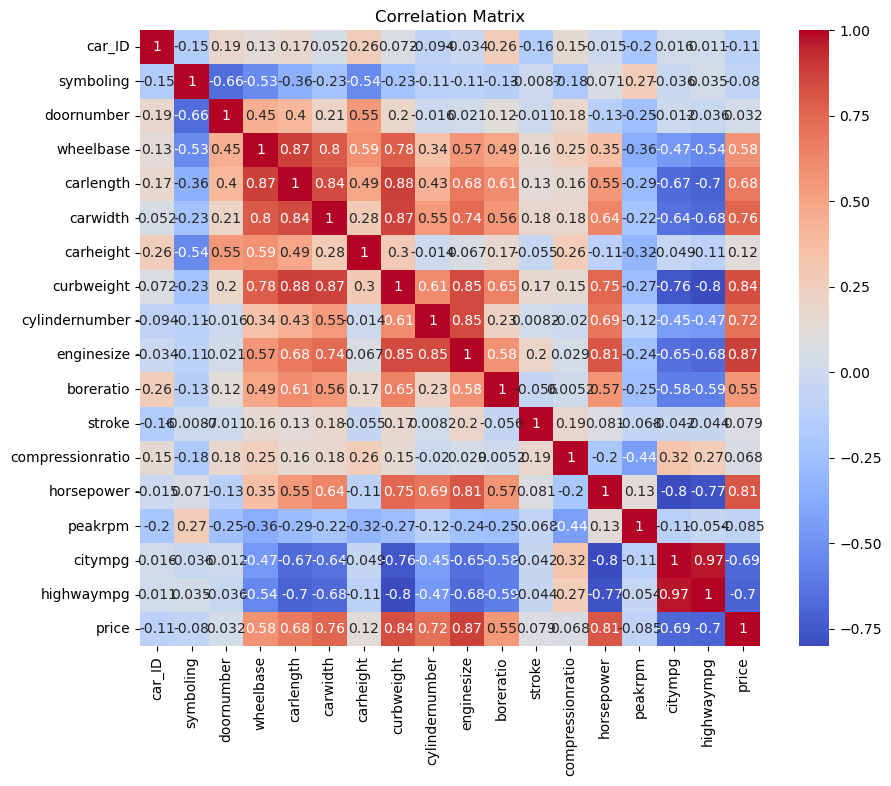

In [65]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [66]:
df.drop(columns=['CarName'], axis = 1, inplace= True)

df.shape

(205, 25)

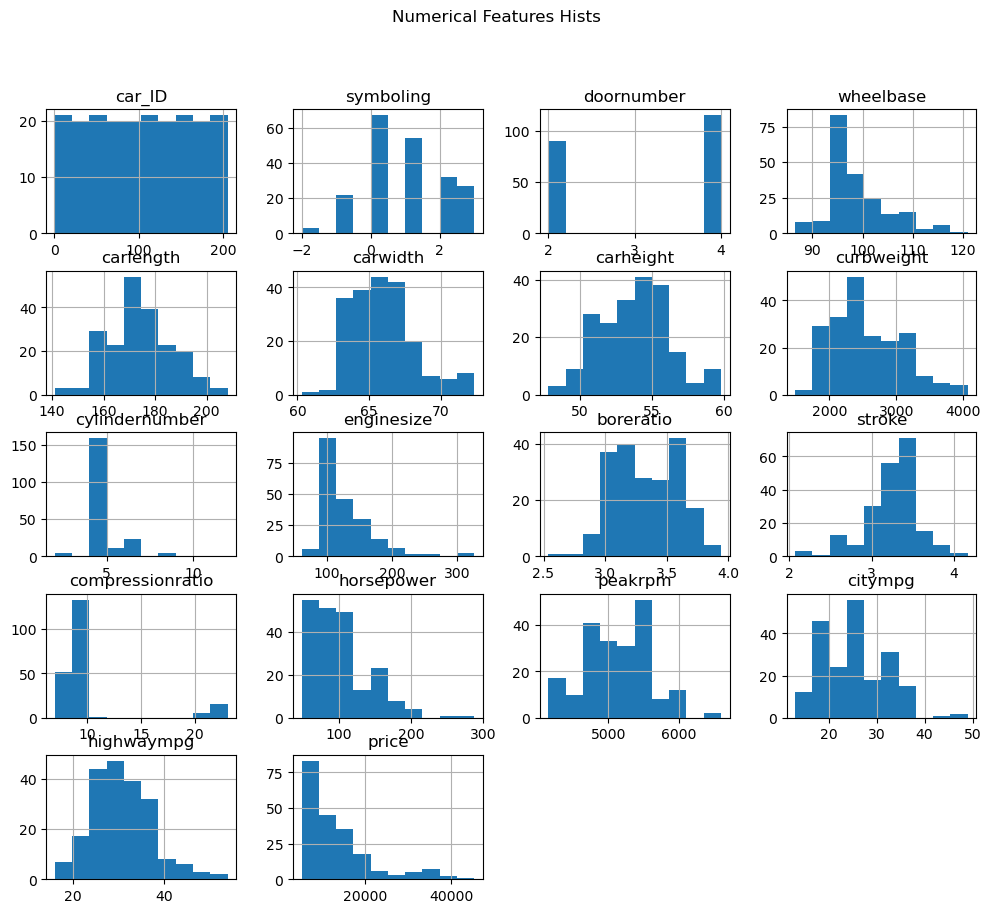

In [67]:
df.hist(figsize=(12, 10))
plt.suptitle('Numerical Features Hists')
plt.show()

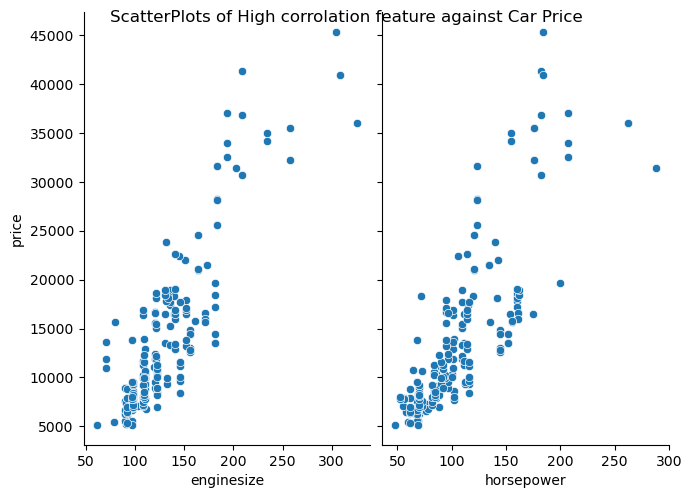

In [68]:
sns.pairplot(df, x_vars=['enginesize', 'horsepower'], y_vars='price', height=5, aspect=0.7)
plt.suptitle('ScatterPlots of High corrolation feature against Car Price')
plt.show()

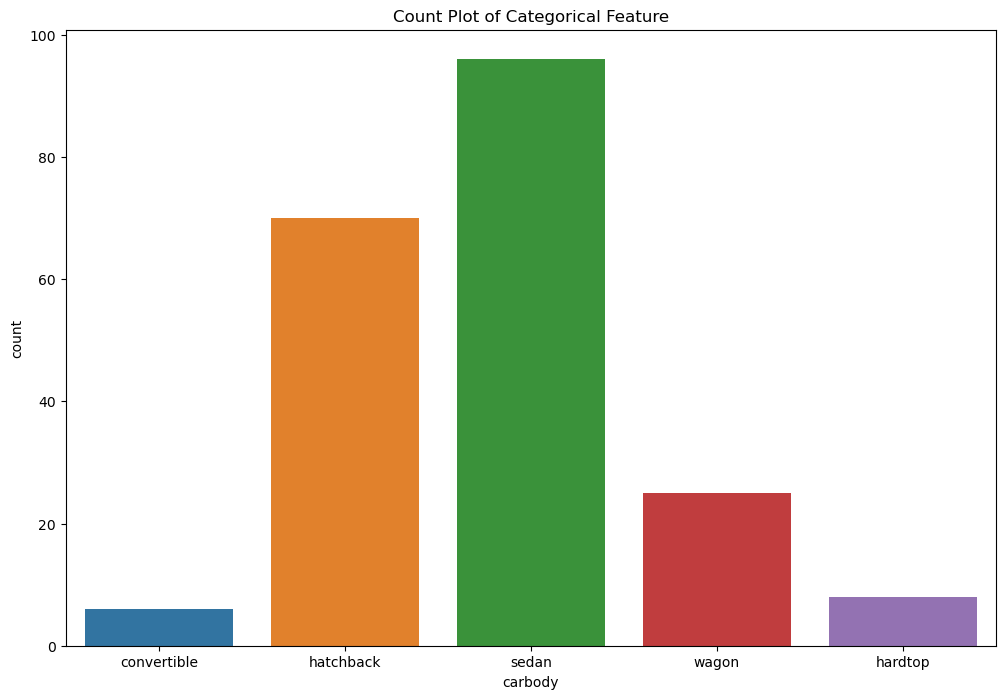

In [69]:
plt.figure(figsize=(12, 8))
sns.countplot(x='carbody', data=df)
plt.title('Count Plot of Categorical Feature')
plt.show()

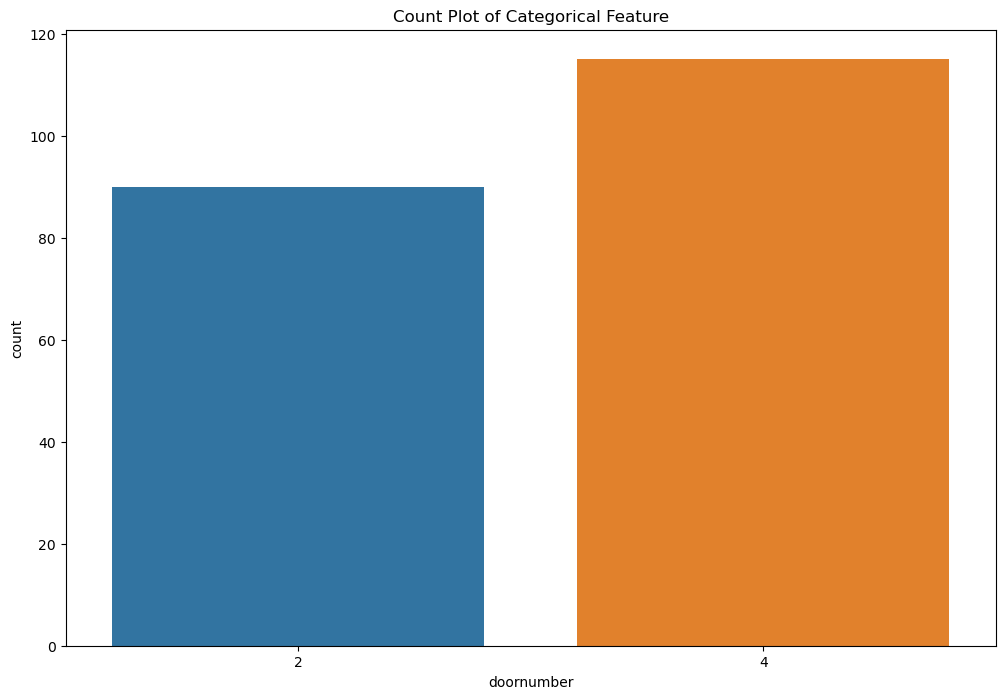

In [70]:
plt.figure(figsize=(12, 8))
sns.countplot(x='doornumber', data=df)
plt.title('Count Plot of Categorical Feature')
plt.show()

In [89]:
df = pd.get_dummies(data= df, columns= ['fueltype', 'aspiration','carbody', 'enginelocation', 'doornumber', 'drivewheel', 'drivewheel', 'enginetype', 'cylindernumber', 'fuelsystem'], drop_first=True)

df.shape

(205, 48)

In [90]:
df

,car_ID,symboling,CarName,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,alfa-romero giulia,88.6,168.8,64.1,48.8,2548,130,3.47,...,0,0,0,0,0,0,0,1,0,0
1,2,3,alfa-romero stelvio,88.6,168.8,64.1,48.8,2548,130,3.47,...,0,0,0,0,0,0,0,1,0,0
2,3,1,alfa-romero Quadrifoglio,94.5,171.2,65.5,52.4,2823,152,2.68,...,0,0,0,0,0,0,0,1,0,0
3,4,2,audi 100 ls,99.8,176.6,66.2,54.3,2337,109,3.19,...,0,0,0,0,0,0,0,1,0,0
4,5,2,audi 100ls,99.4,176.6,66.4,54.3,2824,136,3.19,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),109.1,188.8,68.9,55.5,2952,141,3.78,...,0,0,0,0,0,0,0,1,0,0
201,202,-1,volvo 144ea,109.1,188.8,68.8,55.5,3049,141,3.78,...,0,0,0,0,0,0,0,1,0,0
202,203,-1,volvo 244dl,109.1,188.8,68.9,55.5,3012,173,3.58,...,0,0,0,0,0,0,0,1,0,0
203,204,-1,volvo 246,109.1,188.8,68.9,55.5,3217,145,3.01,...,0,0,0,0,0,1,0,0,0,0


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 48 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   car_ID                 205 non-null    int64  
 1   symboling              205 non-null    int64  
 2   CarName                205 non-null    object 
 3   wheelbase              205 non-null    float64
 4   carlength              205 non-null    float64
 5   carwidth               205 non-null    float64
 6   carheight              205 non-null    float64
 7   curbweight             205 non-null    int64  
 8   enginesize             205 non-null    int64  
 9   boreratio              205 non-null    float64
 10  stroke                 205 non-null    float64
 11  compressionratio       205 non-null    float64
 12  horsepower             205 non-null    int64  
 13  peakrpm                205 non-null    int64  
 14  citympg                205 non-null    int64  
 15  highwa

In [78]:
label_encoder = LabelEncoder()

df['enginetype'] = label_encoder.fit_transform(df['enginetype'])

In [92]:
df.drop('CarName', axis = 1, inplace = True)

In [81]:
df['drivewheel_rwd']

,drivewheel_rwd,drivewheel_rwd
0,1,1
1,1,1
2,1,1
3,0,0
4,0,0
...,...,...
200,1,1
201,1,1
202,1,1
203,1,1


In [93]:
x = df.drop('price', axis = 1)
y = df['price']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.12, random_state= 42)
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, test_size=0.1, random_state= 42)

In [94]:
x_train.shape

(162, 46)

In [99]:
steps = [
    ('scalar', StandardScaler()),
    ('model', Lasso(alpha = 0.01))
    # ('model', LinearRegression())
]

pipeline = Pipeline(steps)

pipeline.fit(x_train, y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.977e+07, tolerance: 1.049e+06
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('scalar', StandardScaler()), ('model', Lasso(alpha=0.01))])

In [100]:
#Lasso

print('train score: ',pipeline.score(x_train, y_train))
print('test score: ',pipeline.score(x_test, y_test))
print('val score: ',pipeline.score(x_val, y_val))

train score:  0.9458928124629343
test score:  0.933360268935773
val score:  0.9147058861139399


In [97]:
#LinearRegression

print('train score: ',pipeline.score(x_train, y_train))
print('test score: ',pipeline.score(x_test, y_test))
print('val score: ',pipeline.score(x_val, y_val))

train score:  0.9458928136066821
test score:  0.933350922814954
val score:  0.9147250863597319
